<a href="https://colab.research.google.com/github/imalvaroglez/data-science-202411/blob/main/3_Preprocesamiento_de_datos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**VARIABLES CATEGÓRICAS**



Una ***variable categórica*** sólo puede tener un número límitado de valores

Por ejemplo: En una encuesta la pregunta cuántas veces va al cine en un mes y se tiene como posibles respuestas: "nunca", "rara vez", "muchas veces" y "todos los días"

Note que este tipo de variables no puede sumarse, por lo que muchos modelos marcaran error y requieren preparse.

Los 3 enfoques principales:

1. Eliminar variables categóricas
2. Convertirlas en ordinales
3. One-hot encoding

**1. Eliminar variables categóricas**

El enfoque más sencillo

**2. Convertirlas en ordinales**

Se  asigna un entero a cada valor categórico



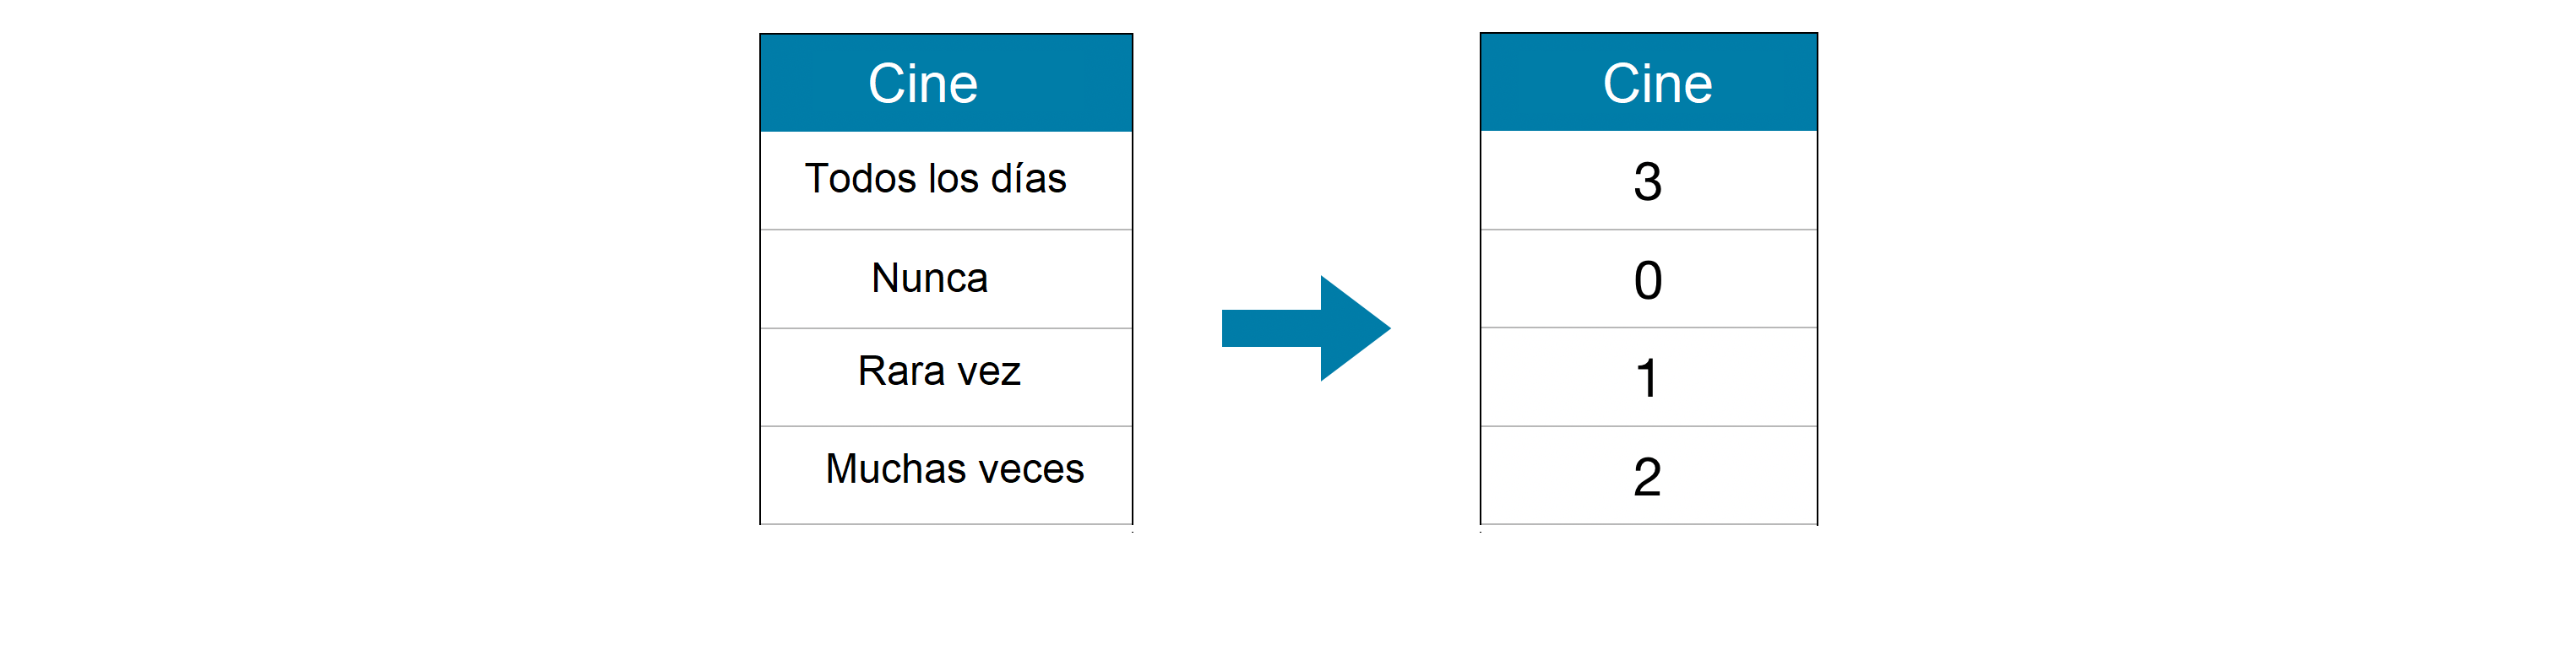

Este enfoque asume un **orden** en las categorias: "nunca" (0) < "rara vez" (1) < "muchas veces" (2) < "todos los días" (3)

Esto tiene significado en este ejemplo, pero no necesariamente es claro para todas las variables categóricas.



##Ejemplo 1

In [ ]:
import pandas as pd

ids = [11,22,33,44]
países = ["España", "Francia", "Alemania", "México"]

df = pd.DataFrame (list (zip (ids, países)), columns = ['Ids', 'Países'])
print (df)

   Ids    Países
0   11    España
1   22   Francia
2   33  Alemania
3   44    México


**3. One-hot encoding**

Se crean nuevas columnas indicando la presencia o ausencia de cada posible valor. Por ejemplo

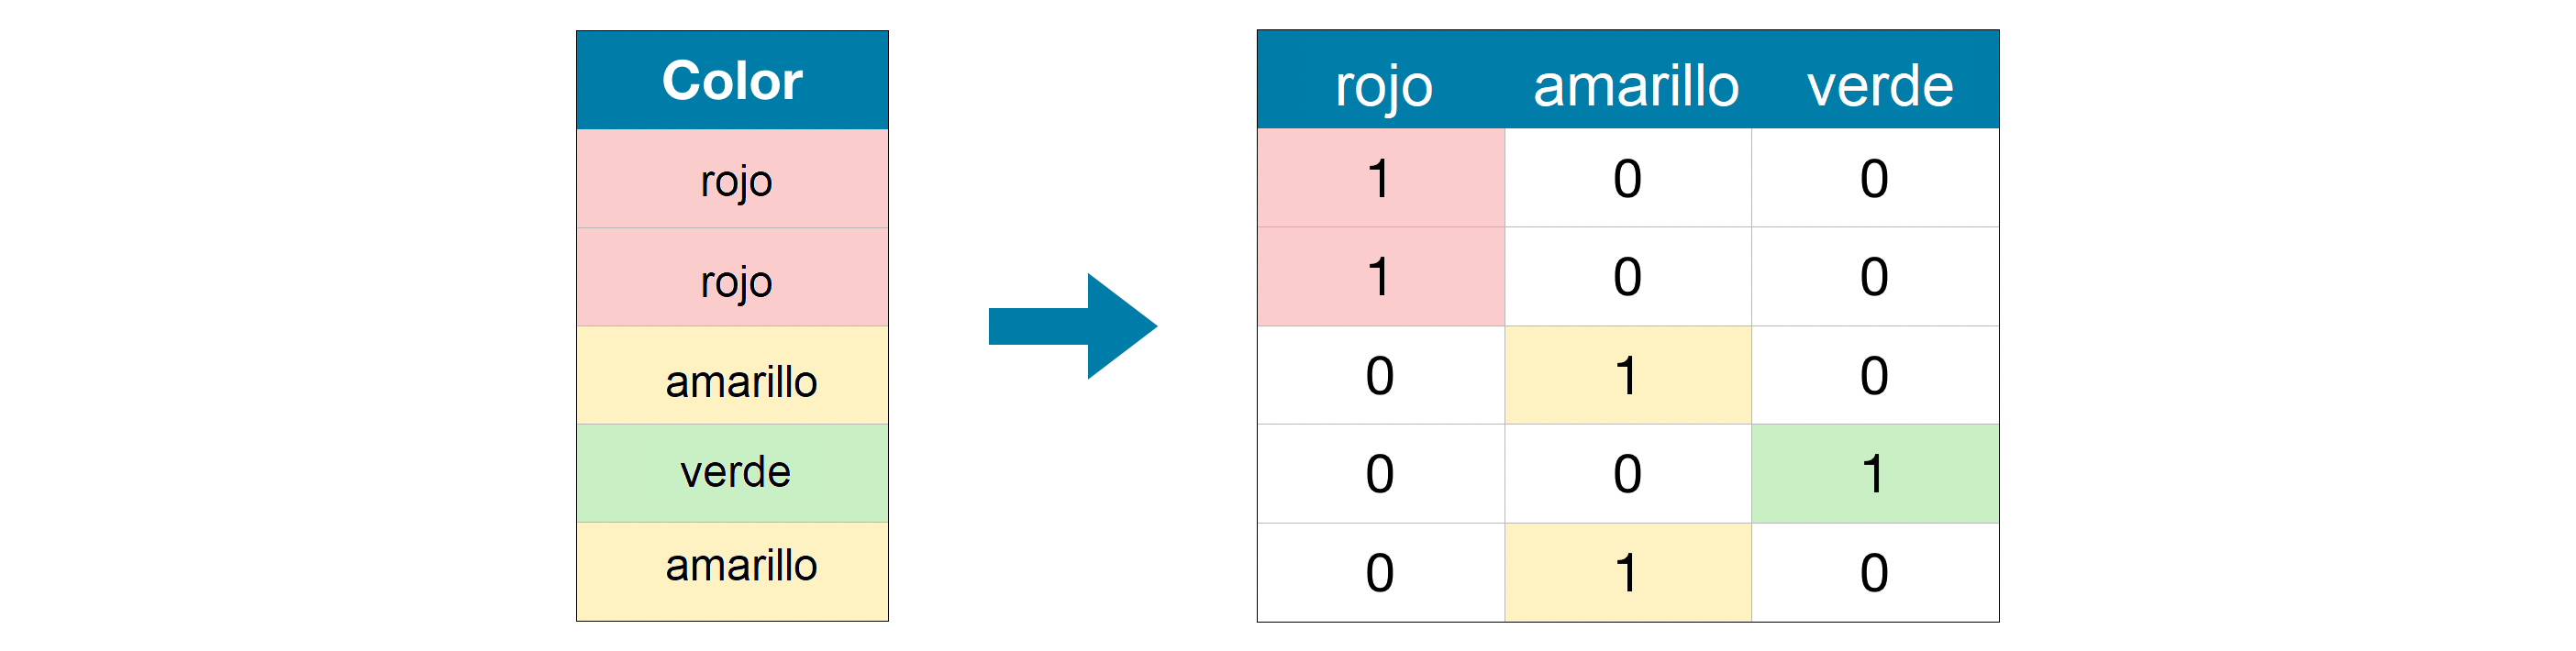

No se asume que las categorías están ordenadas, por lo que es más general y tiende a trabajar mejor. Estas variables también se conocen como **nominales**.

##Ejemplo 2

In [ ]:
# dummies

import pandas as pd

df = pd.DataFrame ({'Países': ['España', 'Francia', 'Alemania', 'México']})
dummies = pd.get_dummies (df['Países'])
print (dummies)

   Alemania  España  Francia  México
0     False    True    False   False
1     False   False     True   False
2      True   False    False   False
3     False   False    False    True


In [ ]:
# Unir columnas

# df con dos columnas
df = pd.DataFrame({
        'nombre': ['josef','michael','juan','bawool','klaus'],
        'país': ['rusia', 'alemania', 'mexico','korea','alemania']
    })

print ("Data frame original:\n ", df, "\n")

# usar pd.concat para unir nuevas columnas en el dataFrame original
df = pd.concat([df,pd.get_dummies(df['país'], prefix='país')],axis=1)

# eliminar la columna 'país' original
df.drop(['país'],axis=1, inplace=True)
print (df)

Data frame original:
      nombre      país
0    josef     rusia
1  michael  alemania
2     juan    mexico
3   bawool     korea
4    klaus  alemania 

    nombre  país_alemania  país_korea  país_mexico  país_rusia
0    josef          False       False        False        True
1  michael           True       False        False       False
2     juan          False       False         True       False
3   bawool          False        True        False       False
4    klaus           True       False        False       False


In [ ]:
# Otra forma es con LabelBinarizer
from sklearn.preprocessing import LabelBinarizer
import pandas as pd

X = pd.DataFrame (list ({1: "España", 2: "Francia", 3: "Alemania", 4: "México"}.items ()), columns=['id','País'])
print (X)
y = LabelBinarizer().fit_transform(X.País)
print (y)

   id      País
0   1    España
1   2   Francia
2   3  Alemania
3   4    México
[[0 1 0 0]
 [0 0 1 0]
 [1 0 0 0]
 [0 0 0 1]]


In [ ]:
# OneHotEncoder
from sklearn.preprocessing import OneHotEncoder

países = [["España"], ["Francia"], [ "Alemania"], [ "México"]]
print (países)
y = OneHotEncoder().fit_transform(países).toarray ()

print (y)

[['España'], ['Francia'], ['Alemania'], ['México']]
[[0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]]


In [ ]:
# Otro ejemplo OneHotEncoder
enc = OneHotEncoder(handle_unknown='ignore')
X = [['Male', 1], ['Female', 3], ['Female', 2]]
enc.fit(X)
enc.categories_

[array(['Female', 'Male'], dtype=object), array([1, 2, 3], dtype=object)]

In [ ]:
enc.transform (X).toarray()

array([[0., 1., 1., 0., 0.],
       [1., 0., 0., 0., 1.],
       [1., 0., 0., 1., 0.]])